## trying for gpt2-medium

See how small prompt changes shift model predictions.

Test how GPT-2 changes predictions based on different contexts.

In [6]:
import torch
import torch.nn.functional as F
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

model_name = "gpt2-medium"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model.eval()

prompts = [
    "i am sexiest person",
    "different perspective of the world in ",
    "the sound travels ",
    " Foreign institutial investors for a country ",
    "fried rice is the most ",
    "the best musician in the world is ",
    "manoj bajpayee is an actor who has worked in movies like ",
    "the porn business is the best business in tech world "
]

for prompt in prompts:
  input_ids = tokenizer.encode(prompt, return_tensors="pt")
  with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits
    next_token_logits = logits[0, -1, :]  # Get logits for next token

  probs = F.softmax(next_token_logits, dim=-1)
  top_probs, top_indices = torch.topk(probs, 8)

  top_tokens = []
  for i in top_indices:
    token = tokenizer.decode([i])
    token = token.replace('\n', '').replace('', '').strip()
    if token == "":
      token = "<blank>"
    top_tokens.append(token)


  print(f"\nPrompt: {prompt}")
  for token, prob in zip(top_tokens, top_probs):
    print(f"{token:<15} {prob.item(): .4f}")


Prompt: i am sexiest person
in               0.2573
on               0.1295
ever             0.1107
alive            0.0808
I                0.0623
you              0.0289
.                0.0270
,                0.0191

Prompt: different perspective of the world in 
vern             0.3259
<blank>          0.2361
________         0.0432
_____            0.0327
『                0.0318
Â                0.0189
�                0.0185
�                0.0149

Prompt: the sound travels 
<blank>          0.5049
」                0.0470
˜                0.0369
________         0.0317
?"               0.0288
�                0.0269
�                0.0243
_____            0.0200

Prompt:  Foreign institutial investors for a country 
<blank>          0.1794
?"               0.1238
�                0.0640
ia               0.0590
!"               0.0295
iz               0.0277
vern             0.0251
ike              0.0204

Prompt: fried rice is the most 
icky             0.2841
<blank>        

GPT-2 uses a Byte Pair Encoding (BPE) tokenizer.

It often returns partial words, strange symbols (�), or whitespace tokens when decoded one token at a time.

In [5]:
import torch
import torch.nn.functional as F
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

model_name = "gpt2-medium"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model.eval()

prompts = [
    "i am sexiest person",
    "different perspective of the world in ",
    "the sound travels ",
    " Foreign institutial investors for a country ",
    "fried rice is the most ",
    "the best musician in the world is ",
    "manoj bajpayee is an actor who has worked in movies like ",
    "the porn business is the best business in tech world "
]

for prompt in prompts:
  input_ids = tokenizer.encode(prompt, return_tensors="pt")
  with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits
    next_token_logits = logits[0, -1, :]  # Get logits for next token

  probs = F.softmax(next_token_logits, dim=-1)
  top_probs, top_indices = torch.topk(probs, 8)
  top_tokens = []
  for i in top_indices:
    token = tokenizer.decode([i])
    token = token.replace('\n', '').replace('', '').strip()
    if token == "":
      token = "<blank>"
    top_tokens.append(token)

  print(f"\nPrompt: {prompt}")
  for token, prob in zip(top_tokens, top_probs):
    print(f"{token:<15} {prob.item(): .4f}")

AttributeError: 'str' object has no attribute 'decode'

##visualize the next-word probabilities using GPT-2

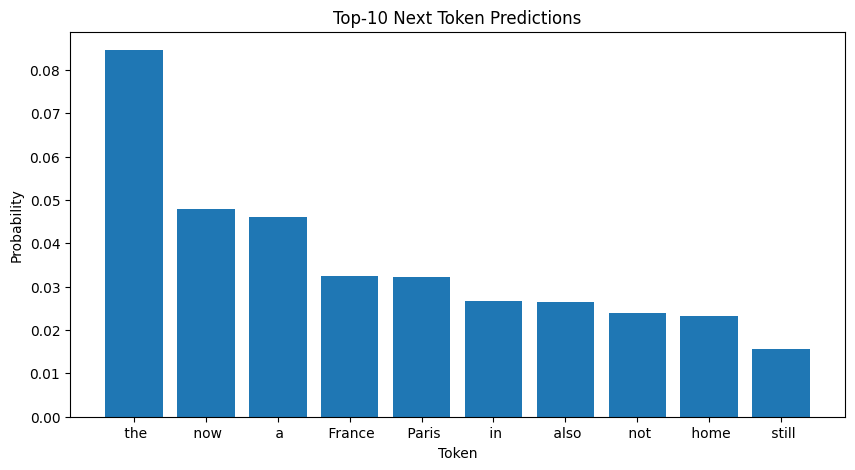

In [3]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load GPT-2
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model.eval()

# Input prompt
prompt = "The capital of France is"
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Get model output
with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits

# Get logits for the next token
next_token_logits = logits[0, -1, :]

# Convert logits to probabilities
probs = F.softmax(next_token_logits, dim=-1)

# Get top 10 predictions
top_k = 10
top_probs, top_indices = torch.topk(probs, top_k)
top_tokens = [tokenizer.decode([idx]) for idx in top_indices]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(top_tokens, top_probs.numpy())
plt.title("Top-10 Next Token Predictions")
plt.xlabel("Token")
plt.ylabel("Probability")
plt.show()


##Temperature Sampling Effect

-see how temperature affects diversity of predicted tokens
- low temp == confident predictions
- high = creative/uncertain

In [8]:
def sample_with_temperature(prompt, temperature=1.0):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    with torch.no_grad():
        logits = model(input_ids).logits
    logits = logits[0, -1, :] / temperature  # scale logits
    probs = F.softmax(logits, dim=-1)
    top_probs, top_indices = torch.topk(probs, 10)
    top_tokens = [tokenizer.decode([i]) for i in top_indices]
    print(f"\nPrompt: {prompt} (Temperature: {temperature})")
    for token, prob in zip(top_tokens, top_probs):
        print(f"  {token.strip():<10} {prob.item():.4f}")

sample_with_temperature("Once upon a time", temperature=0.7)
sample_with_temperature("Once upon a time", temperature=1.5)
sample_with_temperature("laughter is the", temperature= 0.4)


Prompt: Once upon a time (Temperature: 0.7)
  ,          0.9145
  there      0.0273
  I          0.0137
  in         0.0129
  the        0.0076
  we         0.0040
  it         0.0027
  a          0.0020
  (          0.0017
  he         0.0013

Prompt: Once upon a time (Temperature: 1.5)
  ,          0.1259
  there      0.0244
  I          0.0177
  in         0.0173
  the        0.0135
  we         0.0099
  it         0.0083
  a          0.0072
  (          0.0068
  he         0.0059

Prompt: laughter is the (Temperature: 0.4)
  only       0.3652
  most       0.2772
  best       0.1252
  word       0.0569
  name       0.0364
  first      0.0278
  worst      0.0213
  key        0.0155
  one        0.0108
  same       0.0078


## Measure Entropy of Predictions

In [9]:
import math

def calculate_entropy(probs):
    return -torch.sum(probs * torch.log(probs + 1e-10)).item()

prompt = "In the future, AI will"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
with torch.no_grad():
    logits = model(input_ids).logits
probs = F.softmax(logits[0, -1], dim=-1)
entropy = calculate_entropy(probs)
print(f"Entropy for prompt '{prompt}': {entropy:.3f}")


Entropy for prompt 'In the future, AI will': 4.725


## Force Feed a Word and Observe Shift

In [11]:
prompt1 = "i love"
prompt2 = "i love you"

for prompt in [prompt1, prompt2]:
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    with torch.no_grad():
        logits = model(input_ids).logits
    probs = F.softmax(logits[0, -1], dim=-1)
    top_probs, top_indices = torch.topk(probs, 5)
    top_tokens = [tokenizer.decode([i]) for i in top_indices]
    print(f"\nPrompt: '{prompt}' → Next token:")
    for token, prob in zip(top_tokens, top_probs):
        print(f"  {token.strip():<10} {prob.item():.4f}")



Prompt: 'i love' → Next token:
  the        0.0873
  it         0.0870
  you        0.0841
  to         0.0769
  this       0.0519

Prompt: 'i love you' → Next token:
  .          0.1039
  ,          0.1002
  ."         0.0633
  so         0.0423
  and        0.0398
